In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data.csv")
print(len(data))
data.head()

569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# drop id and empty column
data.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

In [5]:
data.isna().sum().sum()

0

In [6]:
# Stat Descriptive
data.describe().round(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0000,569.0000,569.000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.969,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,0.4052,1.2169,2.8661,40.3371,0.0070,0.0255,0.0319,0.0118,0.0205,0.0038,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.299,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,0.2773,0.5516,2.0219,45.4910,0.0030,0.0179,0.0302,0.0062,0.0083,0.0026,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.790,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,0.1115,0.3602,0.7570,6.8020,0.0017,0.0023,0.0000,0.0000,0.0079,0.0009,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.170,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,0.2324,0.8339,1.6060,17.8500,0.0052,0.0131,0.0151,0.0076,0.0152,0.0022,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.240,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,0.3242,1.1080,2.2870,24.5300,0.0064,0.0204,0.0259,0.0109,0.0187,0.0032,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.100,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,0.4789,1.4740,3.3570,45.1900,0.0081,0.0324,0.0420,0.0147,0.0235,0.0046,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.500,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,2.8730,4.8850,21.9800,542.2000,0.0311,0.1354,0.3960,0.0528,0.0790,0.0298,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


In [7]:
# convertir la variable target en 0 et 1
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

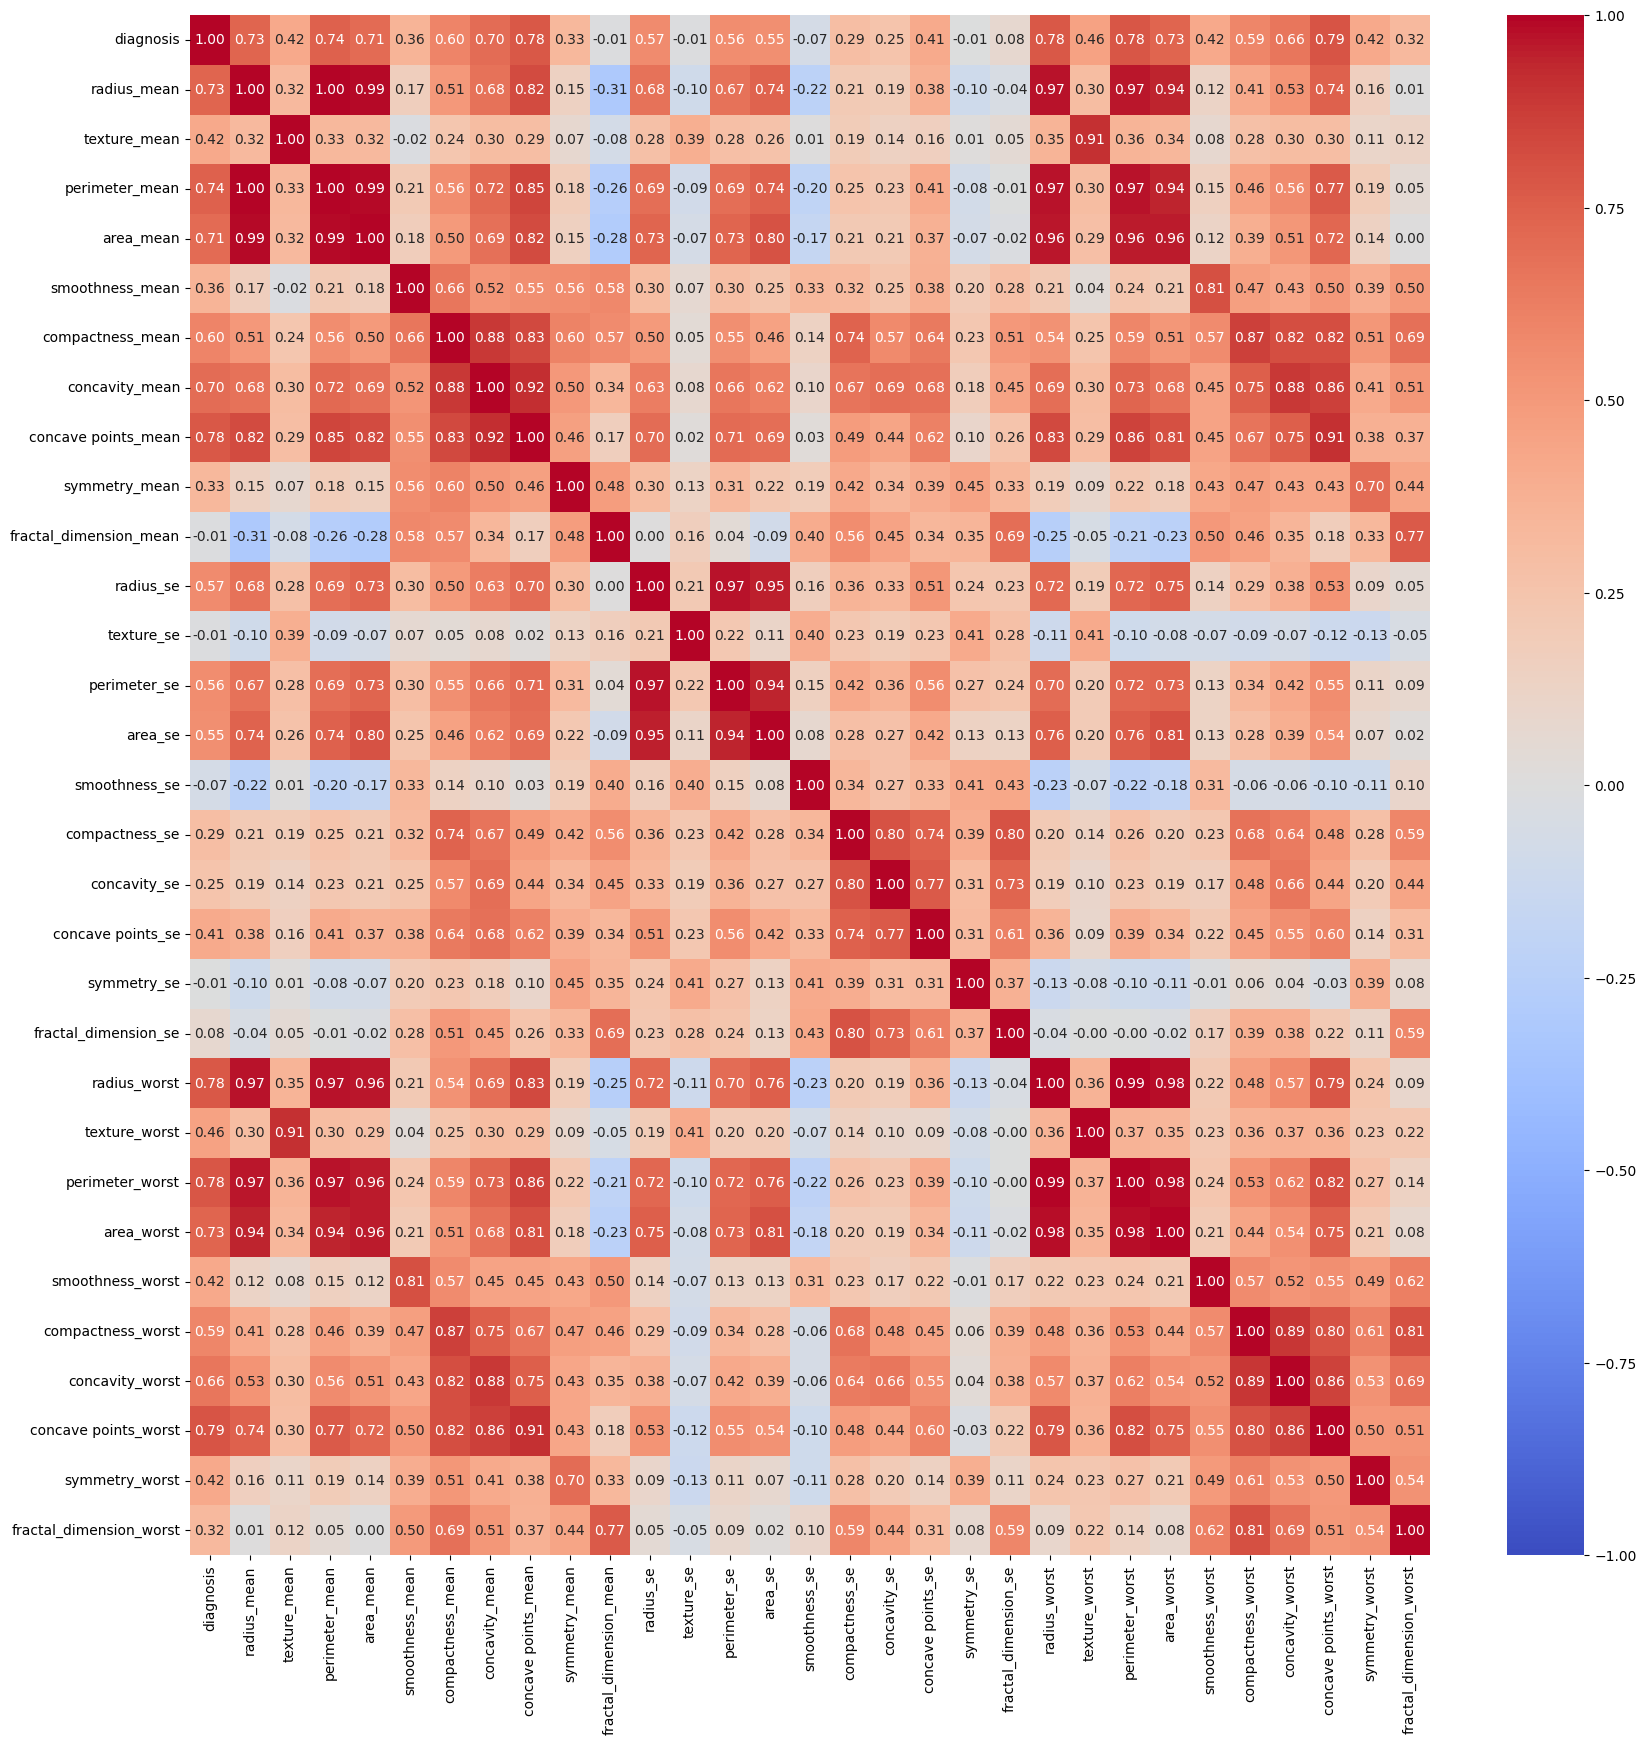

In [8]:
# Correlation and Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

In [13]:
import pandas as pd
import numpy as np  # Use NumPy directly

def remove_highly_correlated_features(df, threshold=0.8):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create an upper triangle mask
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    
    # Drop the identified features
    reduced_df = df.drop(columns=to_drop)
    
    return reduced_df

# Example usage
# df is your DataFrame
reduced_df = remove_highly_correlated_features(data, threshold=0.8)
reduced_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087


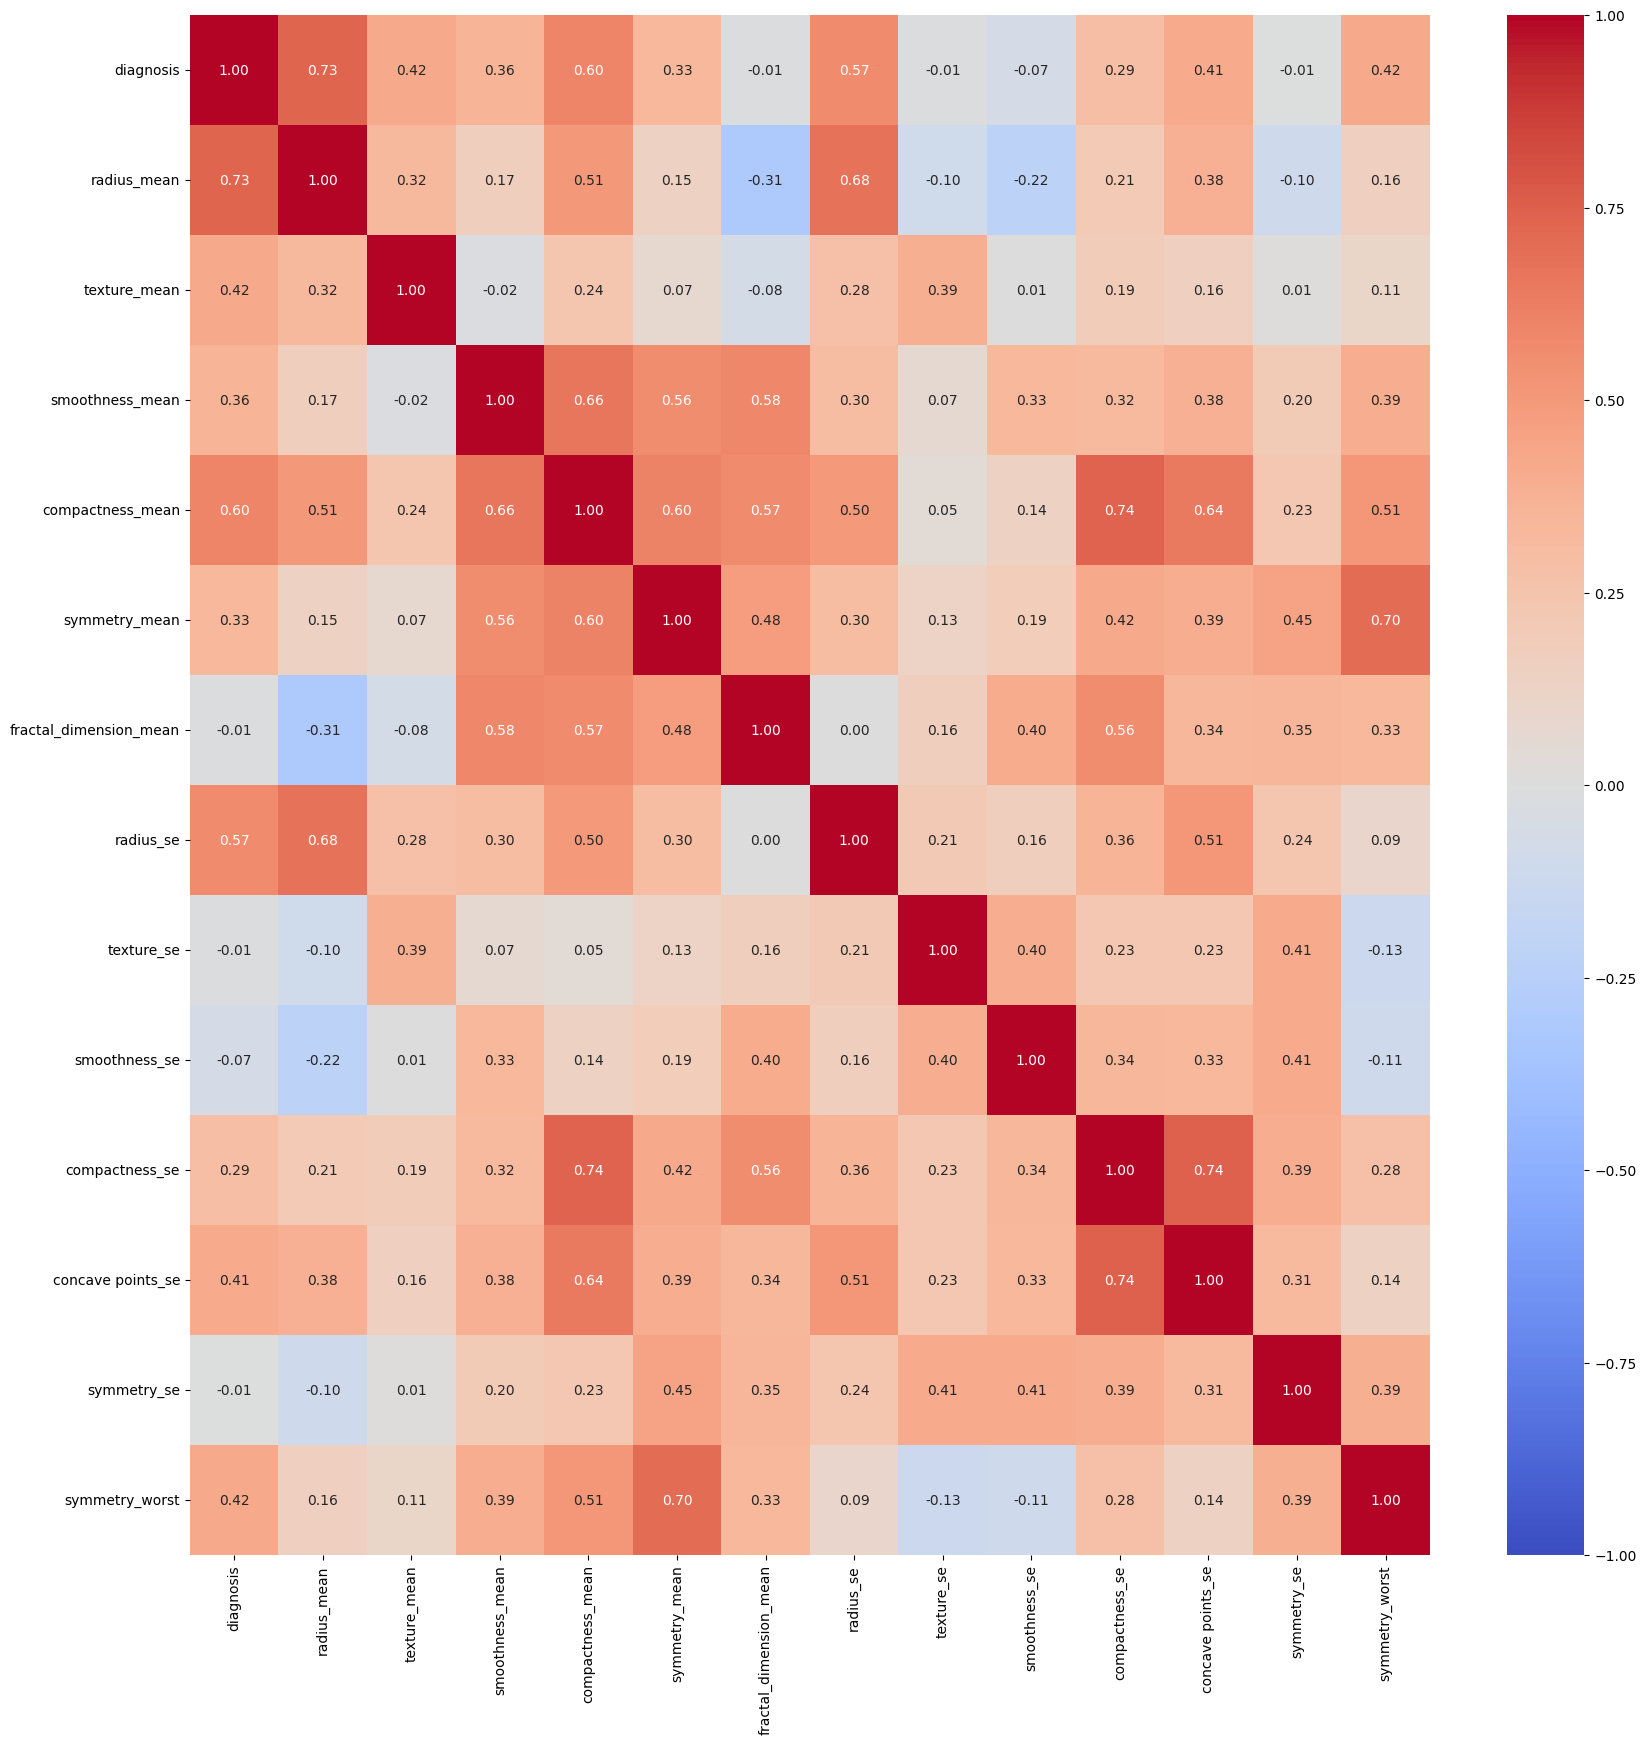

In [14]:
# confusion matrix with new data
plt.figure(figsize=(20, 20))
sns.heatmap(reduced_df.corr(), annot=True, fmt='.2f', cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

In [16]:
# binary logistic regression
X = reduced_df.drop('diagnosis', axis=1)
y = reduced_df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



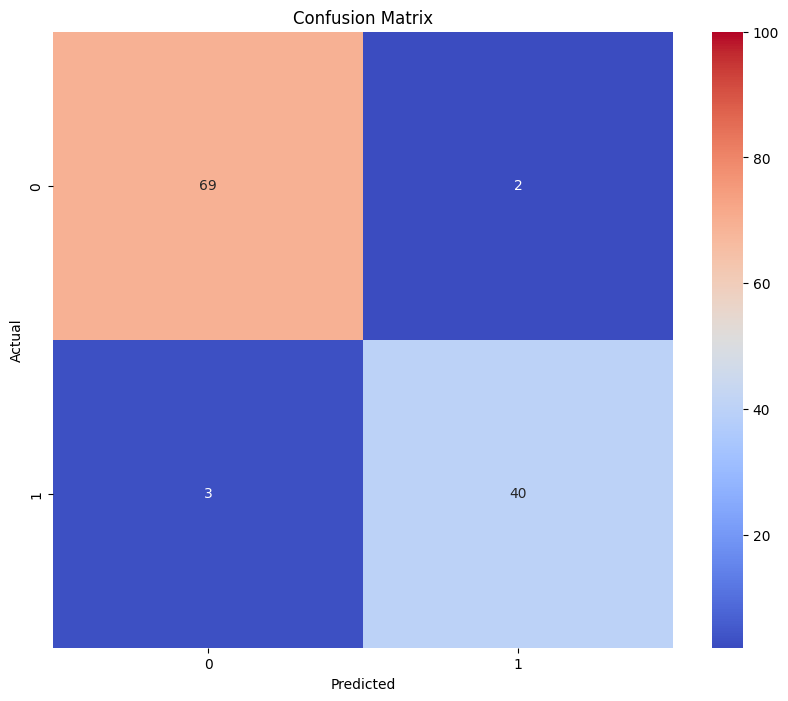

In [17]:
# matrix confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', vmax=100)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
X = data.drop(["diagnosis"], axis=1)
y = data["diagnosis"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
# Evaluate the accuracy of the model
print(f'L\'exactitude : {accuracy_score(y_test, y_pred)*100:.2f} %')
print('Le rapport de classification')
print(classification_report(y_test,y_pred))

L'exactitude : 97.90 %
Le rapport de classification
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [21]:
accuracy_0 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
accuracy_1 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])

print(f'Exactitude pour la catégorie 0 (Bénin) : {accuracy_0 * 100:.2f} %')
print(f'Exactitude pour la catégorie 1 (Malin) : {accuracy_1 * 100:.2f} %')


Exactitude pour la catégorie 0 (Bénin) : 97.75 %
Exactitude pour la catégorie 1 (Malin) : 98.15 %


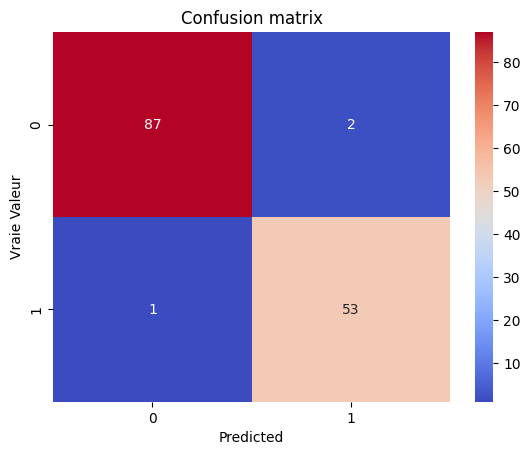

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Vraie Valeur')
plt.title('Confusion matrix')
plt.show()

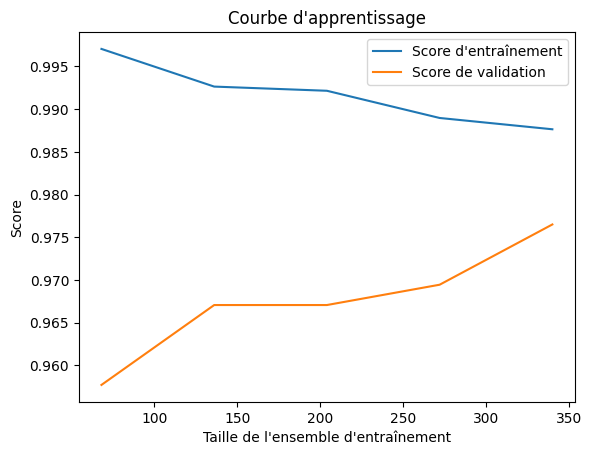

In [25]:
# Tracer la courbe d'apprentissage
n, tr_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1, 5), cv=5)
plt.plot(n, tr_score.mean(axis=1), label="Score d'entraînement")
plt.plot(n, val_score.mean(axis=1), label="Score de validation")
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.legend()
plt.show()

In [28]:
# La validation croisée
# Calculer la précision de la validation croisée
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validated scores:')
for i in range(len(scores)):
    print(f'Fold {i+1}: {scores[i]*100:.2f} %')

Cross-validated scores:
Fold 1: 98.84 %
Fold 2: 96.47 %
Fold 3: 100.00 %
Fold 4: 96.47 %
Fold 5: 96.47 %


In [29]:
from sklearn.metrics import log_loss

# Predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate log loss
log_loss_value = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {log_loss_value}")


Log Loss: 0.06442190191198914
